coda tutorail: http://uoa-eresearch.github.io/eresearch-cookbook/recipe/2014/11/20/conda/


to install python packages, inside the environment:

> conda install -n bw_python36 pandas


In [2]:
from brightway2 import *
from __future__ import unicode_literals, print_function
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams


# import data from simapro

## products

In [24]:
products = pd.read_csv('bwvalidation_products.csv', sep=";");

In [27]:
products.head()

,quantity,unit,product
0,1,kg,"Barley grain {GLO}| market for | Alloc Def, S..."
1,1,kg,"Banana {GLO}| market for | Alloc Def, S (of p..."
2,1,kg,"Apple {GLO}| market for | Alloc Def, S (of pr..."
3,1,kg,"Barley grain {GLO}| market for | Alloc Def, S..."
4,1,kg,"Maize grain {GLO}| market for | Alloc Def, S ..."


## results

In [42]:
results = pd.read_csv('bwvalidation_results.csv', sep=";");
results.set_index('Impact category', inplace=True)

In [43]:
results.head()

,Unit,"Barley grain {GLO}| market for | Alloc Def, S","Banana {GLO}| market for | Alloc Def, S","Apple {GLO}| market for | Alloc Def, S","Barley grain {GLO}| market for | Alloc Def, S.1","Maize grain {GLO}| market for | Alloc Def, S","Oat grain {GLO}| market for | Alloc Def, S","Rice {GLO}| market for | Alloc Def, S","Rye grain {GLO}| market for | Alloc Def, S","Sweet corn {GLO}| market for sweet corn | Alloc Def, S",...,"Broccoli {GLO}| market for | Alloc Def, S","Cabbage red {GLO}| market for | Alloc Def, S","Cabbage white {GLO}| market for | Alloc Def, S","Cauliflower {GLO}| market for | Alloc Def, S","Celery {GLO}| market for | Alloc Def, S","Green asparagus {GLO}| market for | Alloc Def, S","Iceberg lettuce {GLO}| market for | Alloc Def, S","Lettuce {GLO}| market for | Alloc Def, S","Spinach {GLO}| market for | Alloc Def, S","White asparagus {GLO}| market for | Alloc Def, S"
Impact category,,,,,,,,,,,,,,,,,,,,,
"Abiotic depletion (elem., reserve base)",kg Sb eq,0.000081,0.000029,0.000054,0.000081,0.000038,0.000064,0.000060,0.000134,0.000025,...,0.000042,0.000025,0.000024,0.000039,0.000042,0.000130,0.000023,0.000028,0.000020,0.000071
"Abiotic depletion (elem., econ. reserve)",kg Sb eq,0.000165,0.000058,0.000110,0.000165,0.000077,0.000130,0.000123,0.000270,0.000051,...,0.000084,0.000050,0.000047,0.000079,0.000083,0.000261,0.000046,0.000056,0.000040,0.000144
Land competition,m2a,0.053125,0.041793,0.180634,0.053125,0.724810,0.497216,0.852294,0.071548,0.250431,...,0.024410,0.023356,0.023013,0.022183,0.032138,0.044873,0.015333,0.300544,0.010606,2.207559
Lower limit of net global warming,kg CO2 eq,0.279956,0.059280,0.046740,0.279956,0.167905,0.412096,0.172221,0.380849,0.095462,...,0.171824,0.067876,0.064422,0.156606,0.091308,0.566984,0.057592,0.082531,0.065739,0.210627
Upper limit of net global warming,kg CO2 eq,0.280199,0.059479,0.046980,0.280199,0.168078,0.412340,0.172570,0.381160,0.095644,...,0.172093,0.068091,0.064634,0.156876,0.091568,0.568129,0.057776,0.083129,0.065882,0.211163


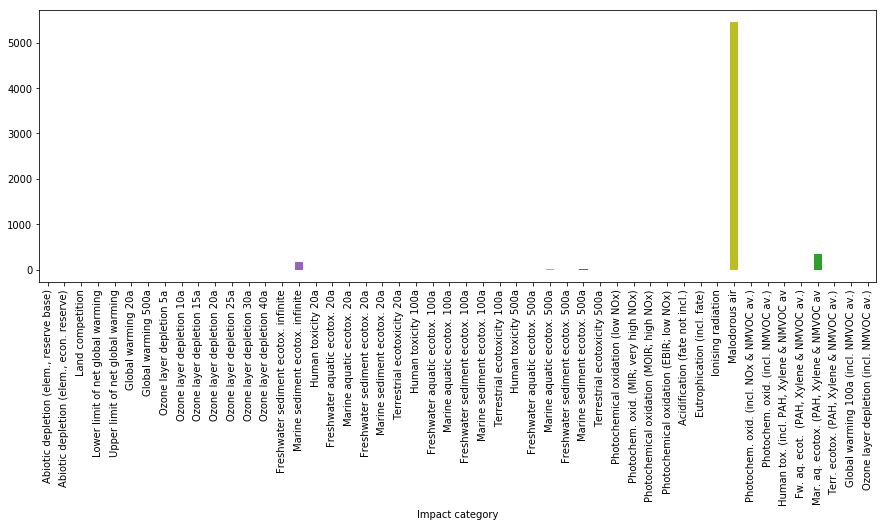

In [44]:
#results.iloc[5].head()#.plot(kind='bar');

results.iloc[:, 2].plot(kind='bar');

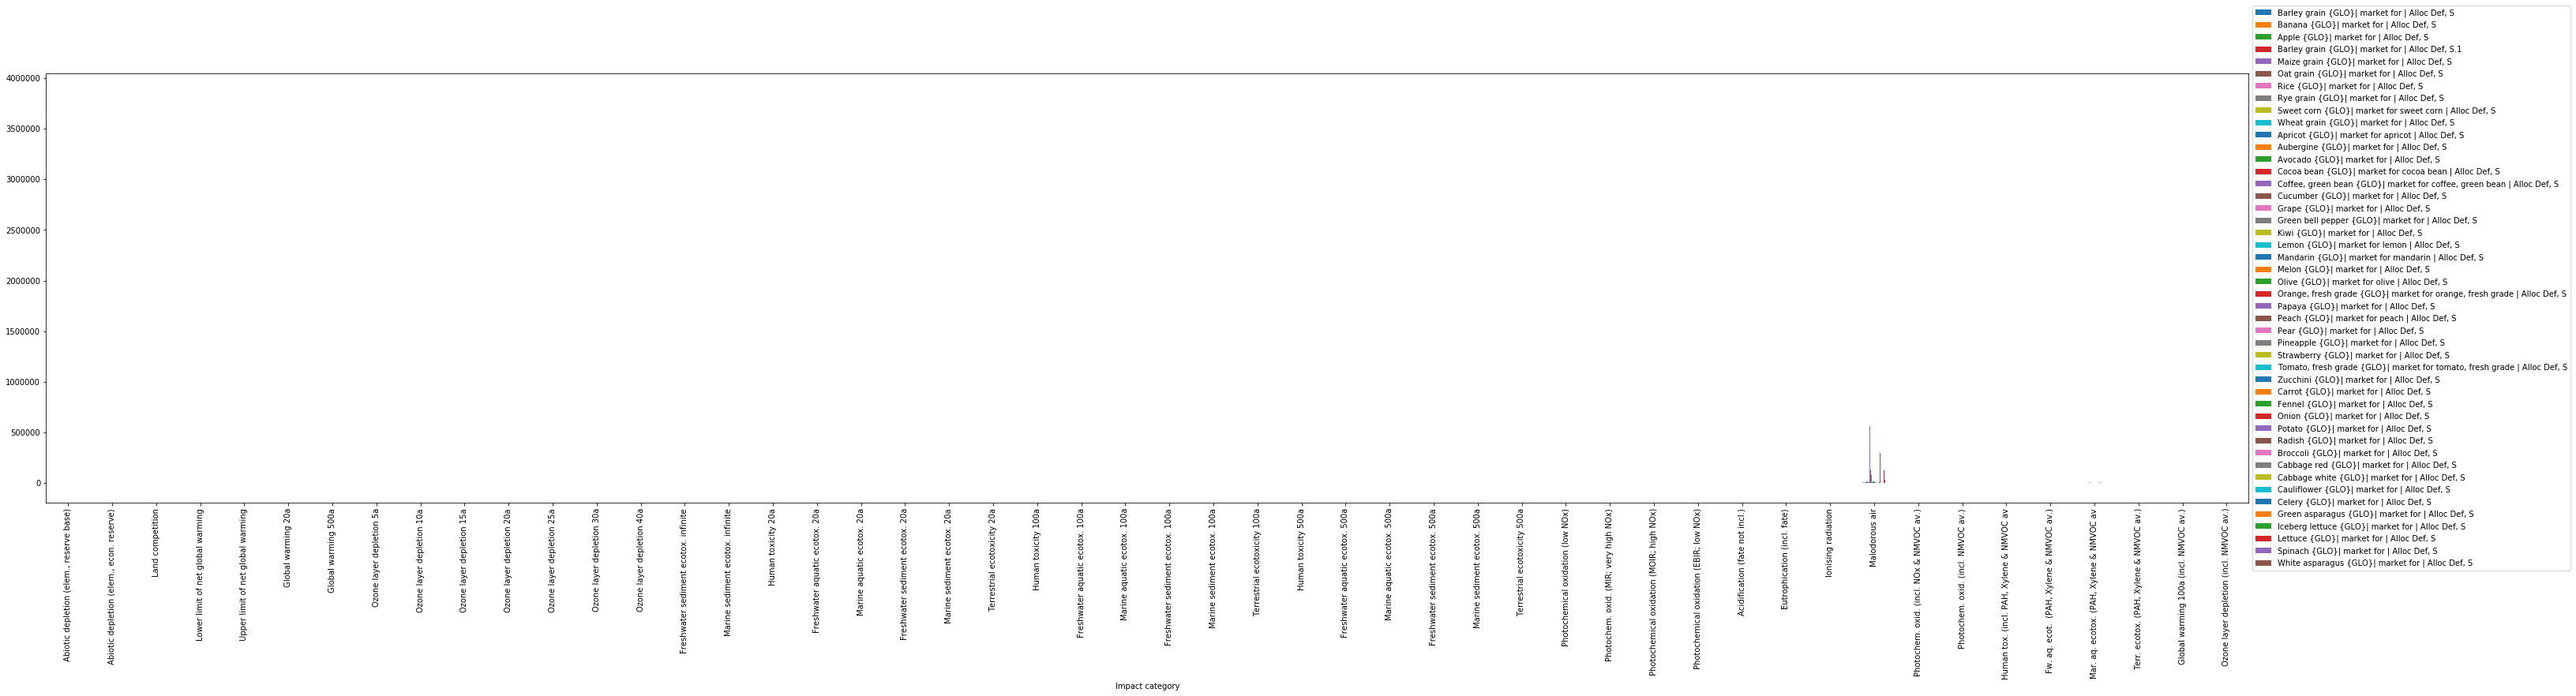

In [50]:
rcParams['figure.figsize'] = 50, 10

f = plt.figure()

# F, M, 
#colors = ['lightskyblue', 'royalblue', 'gold', 'orange', 'firebrick', 'greenyellow','mediumseagreen','darkgreen']

#plt.title('correlacoes entre candidatos e o perfil dos eleitores', color='black')
#results.plot.bar(color=colors)
results.plot.bar()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

# BW

### setup

In [3]:
projects.set_current("bw-validation")

In [4]:
bw2setup()


Biosphere database already present!!! No setup is needed


### ecoinvent import

##### Ecoinvent 3.4

is this really supposed to be cutoff?

### RUN THE SETUP ONLY FOR THE FIRST ITME

In [5]:
#change the path to ecoinvent datasets folder

ei34cutoff = SingleOutputEcospold2Importer(
    "/home/jm/Dropbox/PhD/thesis/papers/step1/urban_lca/bw2/ecoinvent 3.4/ecoinvent 3.4_cutoff_ecoSpold02/datasets",
    "ecoinvent 3.4 cutoff"
)
ei34cutoff.apply_strategies()
ei34cutoff.statistics()

Extracting XML data from 14889 datasets
Extracted 14889 datasets in 33.62 seconds
Applying strategy: normalize_units
Applying strategy: remove_zero_amount_coproducts
Applying strategy: remove_zero_amount_inputs_with_no_activity
Applying strategy: remove_unnamed_parameters
Applying strategy: es2_assign_only_product_with_amount_as_reference_product
Applying strategy: assign_single_product_as_activity
Applying strategy: create_composite_code
Applying strategy: drop_unspecified_subcategories
Applying strategy: link_biosphere_by_flow_uuid
Applying strategy: link_internal_technosphere_by_composite_code
Applying strategy: delete_exchanges_missing_activity
Applying strategy: delete_ghost_exchanges
Applying strategy: remove_uncertainty_from_negative_loss_exchanges
Applying strategy: fix_unreasonably_high_lognormal_uncertainties
Applying strategy: set_lognormal_loc_value
Applied 15 strategies in 3.42 seconds
14889 datasets
520205 exchanges
0 unlinked exchanges
  


(14889, 520205, 0)

In [58]:
ei34cutoff.write_database()

Writing activities to SQLite3 database:
0%                          100%
[##############################] | ETA: 00:00:00
Total time elapsed: 00:02:21


Title: Writing activities to SQLite3 database:
  Started: 12/16/2017 14:15:37
  Finished: 12/16/2017 14:17:58
  Total time elapsed: 00:02:21
  CPU %: 54.40
  Memory %: 11.99
Created database: ecoinvent 3.4 cutoff


Brightway2 SQLiteBackend: ecoinvent 3.4 cutoff

In [60]:
ecoinvent34cutoff = Database("ecoinvent 3.4 cutoff")

### RUN THE SETUP ONLY FOR THE FIRST ITME

In [62]:
print("Number of flows in `biosphere3`:", len(ecoinvent34cutoff))
random_flow = ecoinvent34cutoff.random()
print(random_flow)

Number of flows in `biosphere3`: 14889
'electricity production, photovoltaic, 3kWp slanted-roof installation, multi-Si, panel, mounted' (kilowatt hour, HR, None)


##### find product names

In [65]:
products.head()

,quantity,unit,product
0,1,kg,"Barley grain {GLO}| market for | Alloc Def, S..."
1,1,kg,"Banana {GLO}| market for | Alloc Def, S (of p..."
2,1,kg,"Apple {GLO}| market for | Alloc Def, S (of pr..."
3,1,kg,"Barley grain {GLO}| market for | Alloc Def, S..."
4,1,kg,"Maize grain {GLO}| market for | Alloc Def, S ..."


In [ ]:
'market for barley grain, feed, organic' (kilogram, GLO, None),
'market for banana' (kilogram, GLO, None),
'market for apple' (kilogram, GLO, None),
'market for barley grain, feed, organic' (kilogram, GLO, None),
'market for maize grain' (kilogram, GLO, None),
'market for oat grain, feed' (kilogram, GLO, None),
'market for rice' (kilogram, GLO, None),
'market for rye grain' (kilogram, GLO, None),
'market for sweet corn' (kilogram, GLO, None),
'market for apricot' (kilogram, GLO, None),
'market for aubergine' (kilogram, GLO, None),
'market for avocado' (kilogram, GLO, None),
'market for cocoa bean' (kilogram, GLO, None),
'market for coffee, green bean' (kilogram, GLO, None),
'market for cucumber' (kilogram, GLO, None),
'market for grape' (kilogram, GLO, None),
'market for green bell pepper' (kilogram, GLO, None),
'market for lemon' (kilogram, GLO, None),
'market for mandarin' (kilogram, GLO, None),
'market for melon' (kilogram, GLO, None),
'market for olive' (kilogram, GLO, None),
'market for orange, fresh grade' (kilogram, GLO, None),
'market for papaya' (kilogram, GLO, None),
'market for peach' (kilogram, GLO, None),
'market for pear' (kilogram, GLO, None),
'market for pineapple' (kilogram, GLO, None),
'market for strawberry' (kilogram, GLO, None),
'market for tomato, fresh grade' (kilogram, GLO, None),
'market for zucchini' (kilogram, GLO, None),
'market for carrot' (kilogram, GLO, None),
'market for fennel' (kilogram, GLO, None),
'market for onion' (kilogram, GLO, None),
'market for potato' (kilogram, GLO, None),
'market for radish' (kilogram, GLO, None),
'market for broccoli' (kilogram, GLO, None),
'market for cabbage red' (kilogram, GLO, None),
'market for cauliflower' (kilogram, GLO, None),
'market for celery' (kilogram, GLO, None),
'market for green asparagus' (kilogram, GLO, None),
'market for iceberg lettuce' (kilogram, GLO, None),
'market for lettuce' (kilogram, GLO, None),
'market for spinach' (kilogram, GLO, None),
'market for white asparagus' (kilogram, GLO, None)


In [187]:
Database("ecoinvent 3.4 cutoff").search("maize grain*")[8]

'market for maize grain' (kilogram, GLO, None)

In [189]:
#list of products - HOW TO DO IT BETTER? 
products_list = [
Database("ecoinvent 3.4 cutoff").search("banana*")[5],
Database("ecoinvent 3.4 cutoff").search("apple*")[5],
Database("ecoinvent 3.4 cutoff").search("maize grain*")[8]
]

products_list

['market for banana' (kilogram, GLO, None),
 'market for apple' (kilogram, GLO, None),
 'market for maize grain' (kilogram, GLO, None)]

##### methods

In [126]:
results.index

Index(['Abiotic depletion (elem., reserve base)',
       'Abiotic depletion (elem., econ. reserve)', 'Land competition',
       'Lower limit of net global warming',
       'Upper limit of net global warming', 'Global warming 20a',
       'Global warming 500a', 'Ozone layer depletion 5a',
       'Ozone layer depletion 10a', 'Ozone layer depletion 15a',
       'Ozone layer depletion 20a', 'Ozone layer depletion 25a',
       'Ozone layer depletion 30a', 'Ozone layer depletion 40a',
       'Freshwater sediment ecotox. infinite',
       'Marine sediment ecotox. infinite', 'Human toxicity 20a',
       'Freshwater aquatic ecotox. 20a', 'Marine aquatic ecotox. 20a',
       'Freshwater sediment ecotox. 20a', 'Marine sediment ecotox. 20a',
       'Terrestrial ecotoxicity 20a', 'Human toxicity 100a',
       'Freshwater aquatic ecotox. 100a', 'Marine aquatic ecotox. 100a',
       'Freshwater sediment ecotox. 100a', 'Marine sediment ecotox. 100a',
       'Terrestrial ecotoxicity 100a', 'Human toxic

In [129]:
methods.list

[('CML 2001', 'acidification potential', 'average European'),
 ('CML 2001', 'acidification potential', 'generic'),
 ('CML 2001', 'climate change', 'GWP 100a'),
 ('CML 2001', 'climate change', 'GWP 20a'),
 ('CML 2001', 'climate change', 'GWP 500a'),
 ('CML 2001', 'climate change', 'lower limit of net GWP'),
 ('CML 2001', 'climate change', 'upper limit of net GWP'),
 ('CML 2001', 'eutrophication potential', 'average European'),
 ('CML 2001', 'eutrophication potential', 'generic'),
 ('CML 2001', 'freshwater aquatic ecotoxicity', 'FAETP 100a'),
 ('CML 2001', 'freshwater aquatic ecotoxicity', 'FAETP 20a'),
 ('CML 2001', 'freshwater aquatic ecotoxicity', 'FAETP 500a'),
 ('CML 2001', 'freshwater aquatic ecotoxicity', 'FAETP infinite'),
 ('CML 2001', 'freshwater sediment ecotoxicity', 'FSETP 100a'),
 ('CML 2001', 'freshwater sediment ecotoxicity', 'FSETP 20a'),
 ('CML 2001', 'freshwater sediment ecotoxicity', 'FSETP 500a'),
 ('CML 2001', 'freshwater sediment ecotoxicity', 'FSETP infinite'),
 (

In [191]:
#list of characterization factors - incomplete
characfactors_list = [
 ('CML 2001', 'land use', 'competition'),
 ('CML 2001', 'climate change', 'lower limit of net GWP'),
 ('CML 2001', 'climate change', 'upper limit of net GWP'),
]

characfactors_list

[('CML 2001', 'land use', 'competition'),
 ('CML 2001', 'climate change', 'lower limit of net GWP'),
 ('CML 2001', 'climate change', 'upper limit of net GWP')]

In [13]:
#list of characterization factors - incomplete
characfactors_list = [
 ('CML 2001', 'resources', 'depletion of abiotic resources'),
 ('CML 2001', 'acidification potential', 'generic'),
 ('CML 2001', 'eutrophication potential', 'generic'),
 ('CML 2001', 'freshwater aquatic ecotoxicity', 'FAETP 100a'),
 ('CML 2001', 'freshwater aquatic ecotoxicity', 'FAETP 20a'),
 ('CML 2001', 'freshwater aquatic ecotoxicity', 'FAETP 500a'),
 ('CML 2001', 'freshwater aquatic ecotoxicity', 'FAETP infinite'),
 ('CML 2001', 'freshwater sediment ecotoxicity', 'FSETP 100a'),
 ('CML 2001', 'freshwater sediment ecotoxicity', 'FSETP 20a'),
 ('CML 2001', 'freshwater sediment ecotoxicity', 'FSETP 500a'),
 ('CML 2001', 'freshwater sediment ecotoxicity', 'FSETP infinite'),
 ('CML 2001', 'climate change', 'GWP 100a'),
 ('CML 2001', 'climate change', 'GWP 20a'),
 ('CML 2001', 'climate change', 'GWP 500a'),
 ('CML 2001', 'climate change', 'lower limit of net GWP'),
 ('CML 2001', 'climate change', 'upper limit of net GWP'),
 ('CML 2001', 'human toxicity', 'HTP 100a'),
 ('CML 2001', 'human toxicity', 'HTP 20a'),
 ('CML 2001', 'human toxicity', 'HTP 500a'),
 ('CML 2001', 'human toxicity', 'HTP infinite'),
 ('CML 2001', 'ionising radiation', 'ionising radiation'),
 ('CML 2001', 'land use', 'competition'),
 ('CML 2001', 'malodours air', 'malodours air'),
 ('CML 2001', 'marine aquatic ecotoxicity', 'MAETP 100a'),
 ('CML 2001', 'marine aquatic ecotoxicity', 'MAETP 20a'),
 ('CML 2001', 'marine aquatic ecotoxicity', 'MAETP 500a'),
 ('CML 2001', 'marine aquatic ecotoxicity', 'MAETP infinite'),
 ('CML 2001', 'marine sediment ecotoxicity', 'MSETP 100a'),
 ('CML 2001', 'marine sediment ecotoxicity', 'MSETP 20a'),
 ('CML 2001', 'marine sediment ecotoxicity', 'MSETP 500a'),
 ('CML 2001', 'marine sediment ecotoxicity', 'MSETP infinite'),
 ('CML 2001', 'stratospheric ozone depletion', 'ODP 10a'),
 ('CML 2001', 'stratospheric ozone depletion', 'ODP 15a'),
 ('CML 2001', 'stratospheric ozone depletion', 'ODP 20a'),
 ('CML 2001', 'stratospheric ozone depletion', 'ODP 25a'),
 ('CML 2001', 'stratospheric ozone depletion', 'ODP 30a'),
 ('CML 2001', 'stratospheric ozone depletion', 'ODP 40a'),
 ('CML 2001', 'stratospheric ozone depletion', 'ODP 5a'),
 ('CML 2001', 'stratospheric ozone depletion', 'ODP steady state'),
 ('CML 2001', 'photochemical oxidation (summer smog)', 'EBIR'),
 ('CML 2001', 'photochemical oxidation (summer smog)', 'MIR'),
 ('CML 2001', 'photochemical oxidation (summer smog)', 'MOIR'),
 ('CML 2001', 'photochemical oxidation (summer smog)', 'high NOx POCP'),
 ('CML 2001', 'photochemical oxidation (summer smog)', 'low NOx POCP'),
 ('CML 2001', 'terrestrial ecotoxicity', 'TAETP 100a'),
 ('CML 2001', 'terrestrial ecotoxicity', 'TAETP 20a'),
 ('CML 2001', 'terrestrial ecotoxicity', 'TAETP 500a'),
 ('CML 2001', 'terrestrial ecotoxicity', 'TAETP infinite')
]



### run LCA

In [193]:
characfactors_list[1]

('CML 2001', 'climate change', 'lower limit of net GWP')

In [196]:
products_list[1]

'market for apple' (kilogram, GLO, None)

In [197]:
for product in products_list: 
    print(product)
    functional_unit = {product: 1}
    for factor in characfactors_list:
        print(factor)
        lca = LCA(functional_unit, factor)
        lca.lci()
        lca.lcia()
        print(lca.score)

'market for banana' (kilogram, GLO, None)
('CML 2001', 'land use', 'competition')
0.3534729824410598
('CML 2001', 'climate change', 'lower limit of net GWP')
0.42042528384379374
('CML 2001', 'climate change', 'upper limit of net GWP')
0.42393654401128217
'market for apple' (kilogram, GLO, None)
('CML 2001', 'land use', 'competition')
0.7957326362962058
('CML 2001', 'climate change', 'lower limit of net GWP')
0.4628203952419936
('CML 2001', 'climate change', 'upper limit of net GWP')
0.46768479497732074
'market for maize grain' (kilogram, GLO, None)
('CML 2001', 'land use', 'competition')
0.7565253533423772
('CML 2001', 'climate change', 'lower limit of net GWP')
0.6368085743341312
('CML 2001', 'climate change', 'upper limit of net GWP')
0.639611404596972


In [152]:
functional_unit = {products_list[0]: 1}

In [153]:
lca = LCA(functional_unit, characfactors_list[3])

In [154]:
lca.lci()
lca.lcia()

In [155]:
lca.score

0.19887288313174478